

```
YASH AJAY TAPADIYA
Predicting for 0 in the data
```



In [2]:
import sys

assert sys.version_info >= (3, 7)

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
X.shape

(70000, 784)

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

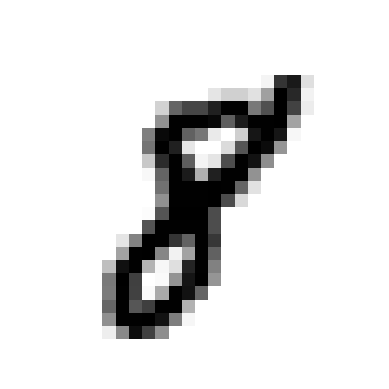

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[17]
plot_digit(some_digit)
plt.show()

In [13]:
y[17]

'8'

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
y_train_8 = (y_train == '8')
y_test_8 = (y_test == '8')

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

In [18]:
sgd_clf.predict([X[9]])

array([False])

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.909  , 0.9286 , 0.88285])

In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_8)
print(any(dummy_clf.predict(X_train)))

False


In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[50006,  4143],
       [ 1448,  4403]])

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_8, y_train_pred)

0.515211794991809

In [24]:
recall_score(y_train_8, y_train_pred)

0.7525209365920356

In [25]:
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.6116552059456831

Precision/Recall Trade-off

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3,
                             method="decision_function")

In [27]:
threshold = 3000

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

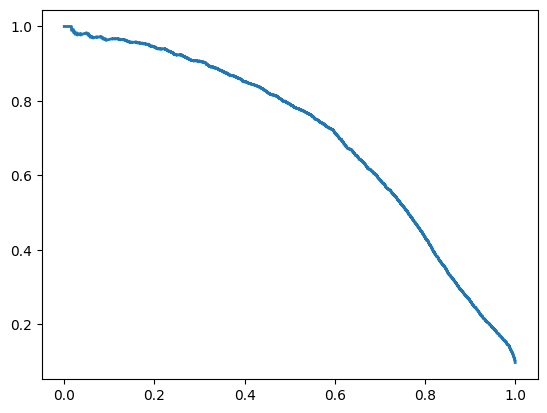

In [29]:
import matplotlib.patches as patches

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.show()

In [30]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(5558.688951079276)

In [31]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [32]:
precision_score(y_train_8, y_train_pred_90)

0.9003419638495359

In [33]:
recall_at_90_precision = recall_score(y_train_8, y_train_pred_90)
recall_at_90_precision

0.3149888907878995

The ROC Curve

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

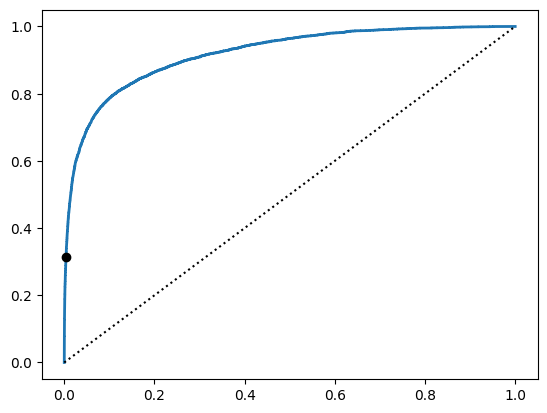

In [35]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")


plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_8, y_scores)

np.float64(0.9192599874103056)

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [38]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=3,
                                    method="predict_proba")

In [39]:
y_probas_forest[:2]

array([[0.98, 0.02],
       [1.  , 0.  ]])

In [40]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_8, y_scores_forest)

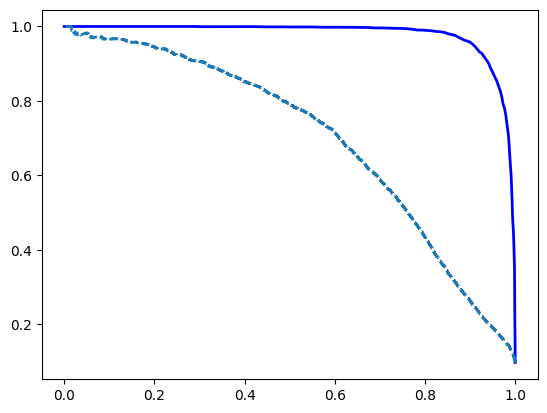

In [41]:

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")


plt.show()

In [42]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_8, y_train_pred_forest)

0.8925557847365461

In [43]:
roc_auc_score(y_train_8, y_scores_forest)

np.float64(0.9965481456893603)

In [44]:
precision_score(y_train_8, y_train_pred_forest)

0.9885773624091381

In [45]:
recall_score(y_train_8, y_train_pred_forest)

0.8135361476670655

COMPARING IT TO LogisticRegression model

In [46]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_8)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
lr_clf.predict([some_digit])

array([ True])

In [48]:
lr_clf.predict([X[9]])

array([False])

In [49]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_clf, X_train, y_train_8, cv=3, scoring="accuracy")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.9484 , 0.94515, 0.9486 ])

CONFUSION MATRIX

In [50]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lr_clf, X_train, y_train_8, cv=3)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[52930,  1219],
       [ 1938,  3913]])

In [52]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_8, y_train_pred)

0.7624707716289946

In [53]:
recall_score(y_train_8, y_train_pred)

0.6687745684498376

In [54]:
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.7125557680050988

In [55]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3,
                             method="decision_function")
threshold = 3000


In [56]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(lr_clf, X_train, y_train_8, cv=3,
                             method="decision_function")
precisions_lr, recalls_lr, thresholds = precision_recall_curve(y_train_8, y_scores)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

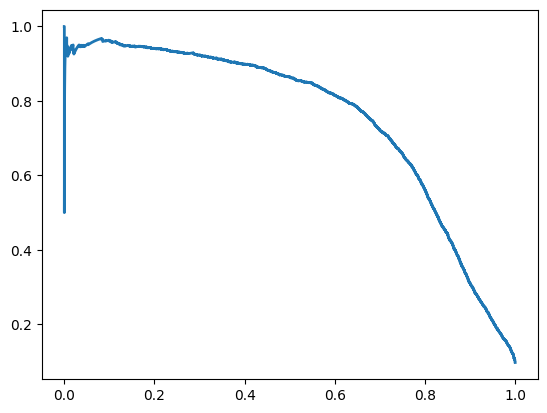

In [57]:
plt.plot(recalls_lr, precisions_lr, linewidth=2, label="Precision/Recall curve")
plt.show()

ROC CURVE

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

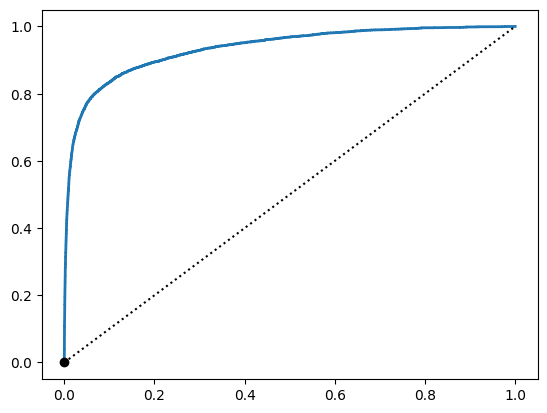

In [59]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_8, y_scores)

np.float64(0.9350896831479307)

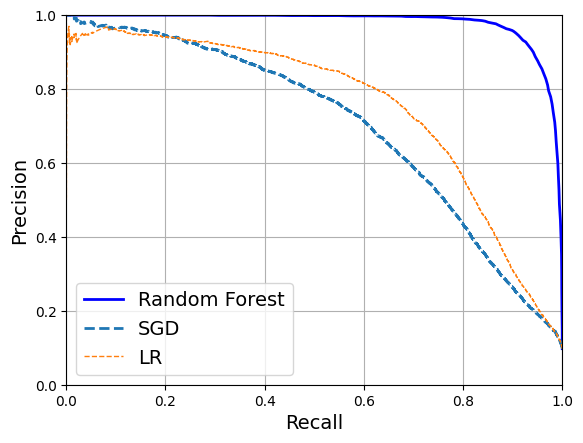

In [61]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.plot(recalls_lr, precisions_lr, "--", linewidth=1, label="LR")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [62]:
# Function to move pixel
import numpy as np
from scipy.ndimage import shift

def shift_image(image, direction):
    image = image.reshape(28, 28)
    if direction == 'left':
        shifted_image = shift(image, [0, -1], cval=0)
    elif direction == 'right':
        shifted_image = shift(image, [0, 1], cval=0)
    elif direction == 'up':
        shifted_image = shift(image, [-1, 0], cval=0)
    elif direction == 'down':
        shifted_image = shift(image, [1, 0], cval=0)
    return shifted_image.reshape(784)

In [63]:
# Using the function to train the data

In [64]:
X_train_augmented = []
y_train_augmented = []

for image, label in zip(X_train, y_train_8):
    X_train_augmented.append(image)
    y_train_augmented.append(label)

    for direction in ['left', 'right', 'up', 'down']:
        shifted_image = shift_image(image, direction)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)


In [65]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [66]:
sgd_clf_augmented = SGDClassifier(random_state=42)
sgd_clf_augmented.fit(X_train_augmented, y_train_augmented)

SGDClassifier(random_state=42)

In [68]:
cross_val_score(sgd_clf_augmented, X_train_augmented, y_train_augmented, cv=3, scoring="accuracy")

array([0.92546, 0.92731, 0.88202])

In [1]:
from sklearn.linear_model import LogisticRegression

lr_clf_augmented = LogisticRegression()
lr_clf_augmented.fit(X_train_augmented, y_train_augmented)

NameError: name 'X_train_augmented' is not defined